# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](https://drive.google.com/file/d/1-iXooLjNuEXU41dqz8ORQ5JEZPHd9x0X/view?usp=sharing).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

The dataset is [here](https://drive.google.com/file/d/1MRhRtdX8QuPPEhelBIS_FEl5vJjRLSeE/view?usp=sharing). Please download it and place it in the data folder.<br>
First, import the basic libraries and the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df.drop(['Id'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of what your output  should look like is [here](https://drive.google.com/file/d/1cuq6qhFZC5wavm-_STcxktBKdAc4xvH8/view?usp=sharing)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [5]:
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
...,...,...
Heating,Heating,0.000000
HeatingQC,HeatingQC,0.000000
MSZoning,MSZoning,0.000000
1stFlrSF,1stFlrSF,0.000000


In [6]:
percent_missing = df.loc[:, df.isnull().mean() > .20]
percent_missing #this is showing the only the columns that have more than 20% missing values

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN
...,...,...,...,...,...
1455,NaN,TA,NaN,NaN,NaN
1456,NaN,TA,NaN,MnPrv,NaN
1457,NaN,Gd,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

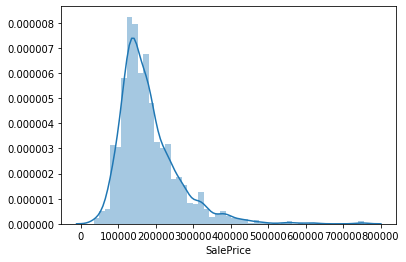

In [8]:
# your code here
sns.distplot(df['SalePrice'])

In [9]:
# your comment here
#yes the sales price has a normal distribution, the majority of values fall between 100K and 300K, and outside of those values there are the outliers of either very cheap or very expensive houses


## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

In [10]:
# your code here


## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [11]:
df['TotalArea']=df['GrLivArea']+df['LotArea']+df['LotArea']
df #creating a column with data about the sum of all specific type of areas, creating one total area figure to be used for analysis

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,18610
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,20462
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,24286
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,20817
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,30718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,17481
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,28423
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,20424
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,142125,20512


In [12]:
# your code here

df['TotalBath'] = df['FullBath']+df['HalfBath']+df['BsmtFullBath']+df['BsmtHalfBath']
df['Ratio Bath per Room'] = df['TotalBath']/df['TotRmsAbvGrd']
#adding up both full and half baths and then creating the ratio of baths on the total number of rooms
# add cells as needed

In [13]:
df['Yrs from last renovation']=2020-df['YearRemodAdd']
df['Yrs from built']=2020-df['YearBuilt']
df['Yrs between built and last renovation']=df['Yrs from built']-df['Yrs from last renovation']
df #creating a few columns related to the Year built and Year renovated

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,TotalBath,Ratio Bath per Room,Yrs from last renovation,Yrs from built,Yrs between built and last renovation
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,208500,18610,4,0.500000,17,17,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,181500,20462,3,0.500000,44,44,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,223500,24286,4,0.666667,18,19,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,140000,20817,2,0.285714,50,105,55
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,250000,30718,4,0.444444,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2007,WD,Normal,175000,17481,3,0.428571,20,21,1
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,210000,28423,3,0.428571,32,42,10
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,266500,20424,2,0.222222,14,79,65
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,142125,20512,2,0.400000,24,70,46


In [14]:
new = df[['SalePrice', 'TotalArea', 'Ratio Bath per Room','Yrs from last renovation']].copy()
new

,SalePrice,TotalArea,Ratio Bath per Room,Yrs from last renovation
0,208500,18610,0.500000,17
1,181500,20462,0.500000,44
2,223500,24286,0.666667,18
3,140000,20817,0.285714,50
4,250000,30718,0.444444,20
...,...,...,...,...
1455,175000,17481,0.428571,20
1456,210000,28423,0.428571,32
1457,266500,20424,0.222222,14
1458,142125,20512,0.400000,24


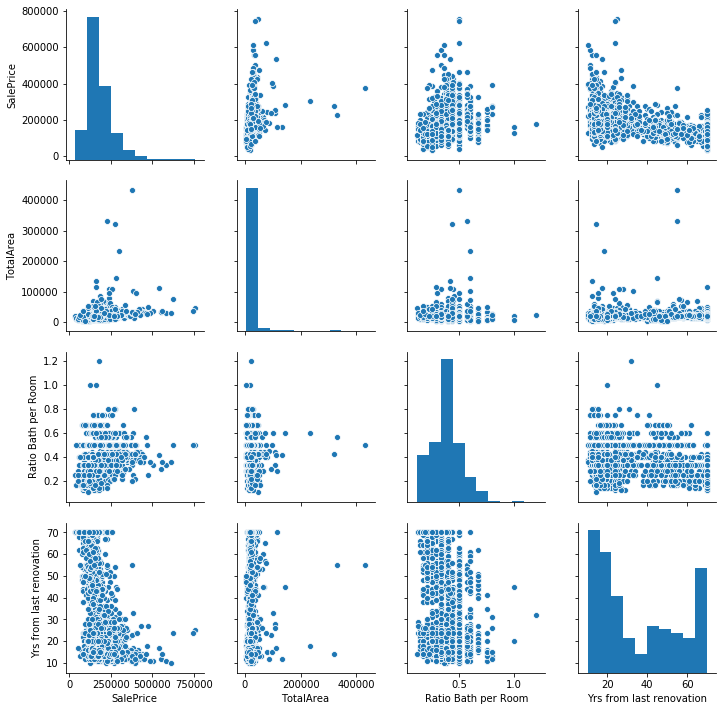

In [15]:
sns.pairplot(new)
plt.show()

From the correlation matrix we can see Sales Price is positively correlated with TotalArea, meaning the price is higher the larger the Total Area.
Also positively correlated with the Ratio Bath per room, meaning the more bathrooms per total number of rooms the higher the price.
The Sales Price is negatively correlated with the Years from the latest renovation, meaning that the longer the time from the last renovation the lower the price, while the shorter the time from the last renovation the higher the price

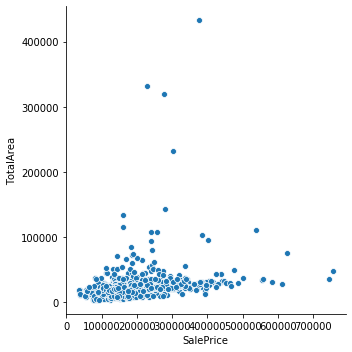

In [16]:
sns.relplot(x="SalePrice", y="TotalArea", data=df);
plt.show()

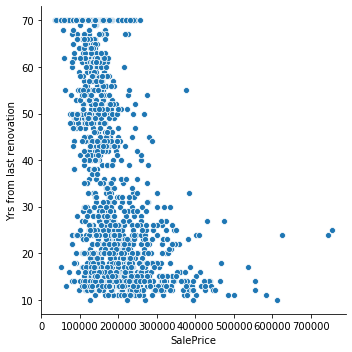

In [17]:
sns.relplot(x="SalePrice", y="Yrs from last renovation", data=df);
plt.show()

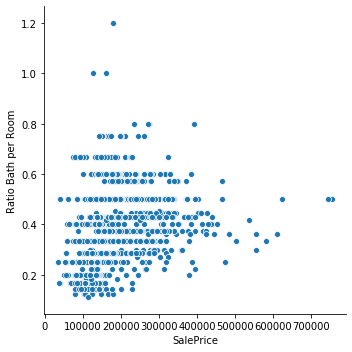

In [18]:
sns.relplot(x="SalePrice", y="Ratio Bath per Room", data=df);
plt.show()

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like this [example](https://drive.google.com/file/d/1JhdNvbAnnWDFXEtDoBtx3B2KKIkqsnSH/view?usp=sharing)

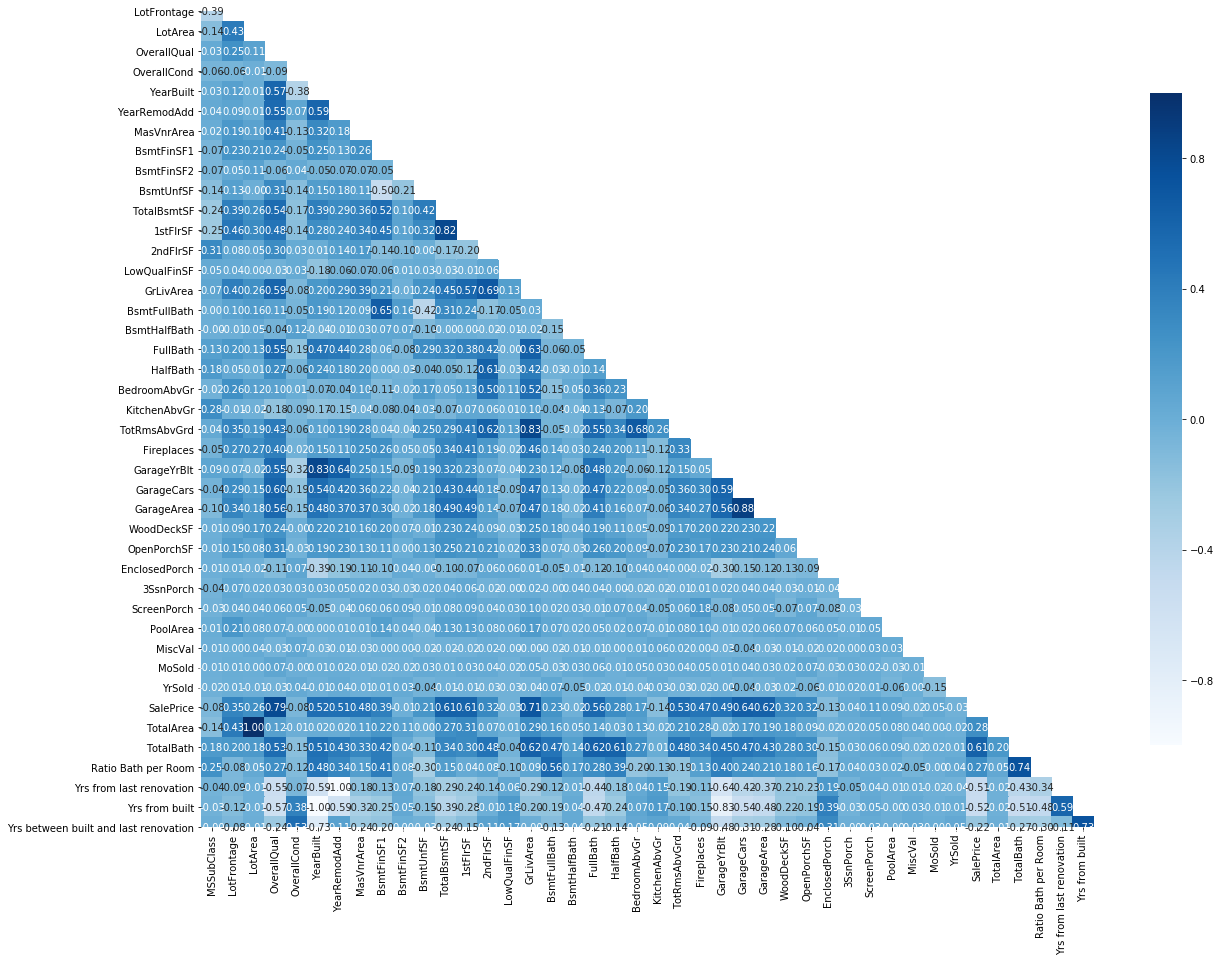

In [19]:
# your code here

fig, ax = plt.subplots(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
mask = mask[1:, :-1]
corr = df.corr().iloc[1:,:-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [20]:
# your comment here
#Overall Quality with 0.79 
#Ground Living Area with 0.71
#Total Basement SF and 1st floor SF with 0.61
#Garage Area with 0.64
#Total Bath with 0.61
#Years from last renovation/built negatively correlated with -0.51/-0.52

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

# Overall Quality impacting Sale Price of a house

Overall Quality expressed in points ranging from 0 to 10, is strongly positively correlated with the Sale Price.
The higher the vote, the higher the sale price. Strong positive correlation at 0.79.

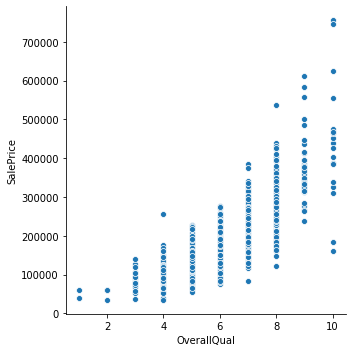

In [21]:
sns.relplot(x="OverallQual", y="SalePrice", data=df);
plt.show()

# Ground Living Area impacting Sale Price of a house

Ground Living Area shows the livable area, which is the most useful when looking at buying a house, since this is the actual area that will be used.
This factor is strongly positively correlated with the Sale Price, at 0.71.
As we can see from the graph, the higher the living area, the higher the sales price.

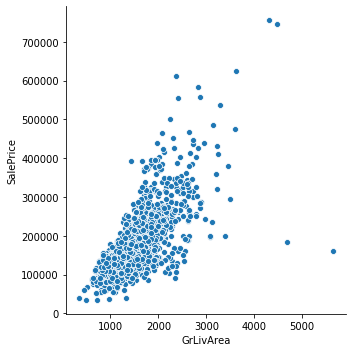

In [22]:
sns.relplot(x="GrLivArea", y="SalePrice", data=df);
plt.show()

# Garage Area impacting Sale Price of a house

Like the other factors of area, the larger the garage space is the higher the price.
There is a strong positive correlation of 0.64 between garage area and the sale price.

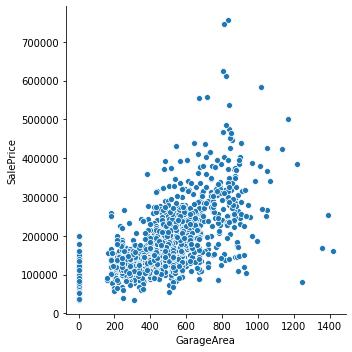

In [23]:
sns.relplot(x="GarageArea", y="SalePrice", data=df);
plt.show()

# Total Basement Surface area and 1st floor surface area impacting Sale Price of a house

Both Total basement surface area and 1st floor surface area are factors with strong positive correlation to the sale price. 
Values for these both at 0.61.
Similar to the other factors related to space, when the surface area is higher the price is also higher.

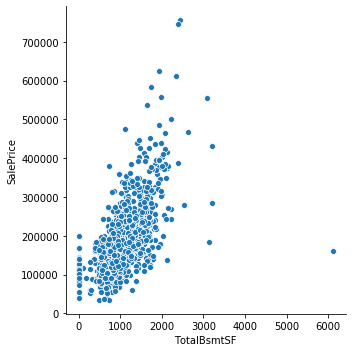

In [24]:
sns.relplot(x="TotalBsmtSF", y="SalePrice", data=df);
plt.show()

# Years from last renovation or from when built impacting Sale Price of a house

Compared to the rest of the factors which were positively correlated to Sales Price, the number of years passed from the last renovation, as well as number of years passed from when the house was built, are showing a strong negative correlation.
Years from last renovation is showing a -0.51 correlation.
This implies that the more time has passed since the last renovation or since the house was built, the higher that chances the house will have a lower selling price.

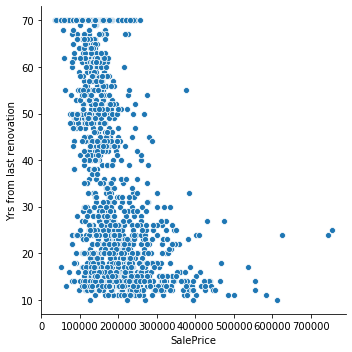

In [25]:
sns.relplot(x="SalePrice", y="Yrs from last renovation", data=df);
plt.show()